In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import scipy
import math

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

In [4]:
data = pd.read_csv('data/Casualties0514.csv', usecols=range(0, 14))
data.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type'],
      dtype='object')

Mean = 20873.076923076922
Std = 18883.52792255131
Var = 356587626.8017751
Size = 104


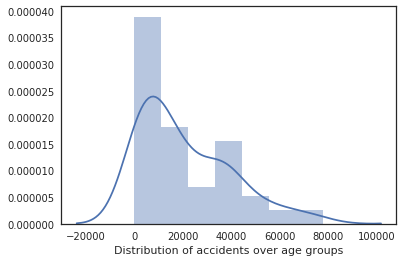

In [9]:
subset_data = data[['Accident_Index','Age_of_Casualty']]
subset_data = subset_data[subset_data.Age_of_Casualty != -1]
accidents_age_of_casualty_data = list(subset_data.groupby(['Age_of_Casualty']).count().Accident_Index)
mean = np.mean(accidents_age_of_casualty_data)
std = np.std(accidents_age_of_casualty_data)
var = np.var(accidents_age_of_casualty_data)
print("Mean = "+str(mean))
print("Std = "+str(std))
print("Var = "+str(var))

standardized_accidents_age_of_casualty_data = [(x-mean)/std for x in  accidents_age_of_casualty_data]
size = len(standardized_accidents_age_of_casualty_data)
print("Size = "+str(size))

# sns.distplot(standardized_accidents_age_of_casualty_data, axlabel='Distribution of accidents over age groups')
sns.distplot(accidents_age_of_casualty_data, axlabel='Distribution of accidents over age groups')
#plt.show()


In [36]:
print("Null Hypothesis(H0): 'Total number of Accidents that involved casualties of different ages over last 10 years' follow a Normal Distribution.")
print("Alternate Hypothesis(H1): 'Total number of Accidents that involved casualties of different ages over last 10 years' do not follow a Normal Distribution.\n")

ks_test_statistic = scipy.stats.kstest(standardized_accidents_time_of_day_data, 'norm')[0]
print("ks_test_statistic = "+str(ks_test_statistic))

#from ks table the critical value Dn,α for D1439,0.02=(1.51743)/sqrt(size)
alpha = 0.02
critical_value = 1.51743/math.sqrt(size)
print("Critical value at α = 0.02 is " + str(critical_value)+"\n")

if ks_test_statistic > critical_value:
    print("Null Hypothesis is rejected at α = "+str(alpha))
    print("Therefore, 'Total number of Accidents that involved casualties of different ages over last 10 years' do not follow a Normal Distribution.\n")
else:
    print("Null Hypothesis is accepted at α = "+str(alpha))
    print("Therefore, 'Total number of Accidents that involved casualties of different ages over last 10 years' follow a Normal Distribution.\n")

Null Hypothesis(H0): 'Total number of Accidents that involved casualties of different ages over last 10 years' follow a Normal Distribution.
Alternate Hypothesis(H1): 'Total number of Accidents that involved casualties of different ages over last 10 years' do not follow a Normal Distribution.

ks_test_statistic = 0.142485860509
Critical value at α = 0.02 is 0.14738583061167834

Null Hypothesis is accepted at α = 0.02
Therefore, 'Total number of Accidents that involved casualties of different ages over last 10 years' follow a Normal Distribution.



<p>Since Sample Mean and Sample Varience are the MME estimators of True Mean and True Varience for a Normal Distribution:</p>
<p>$Mean_{MME}$ = 22419.0</p>
<p>$Var_{MME}$ = 414616893.79</p>